<a href="https://colab.research.google.com/github/MasDiptha12/Machine-Learning/blob/main/Week_5/Netflix_Titles.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving netflix_titles.csv to netflix_titles.csv


In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Baca dataset Netflix
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.info()

# Menghapus baris dengan data kosong di kolom penting
df = df.dropna(subset=['title', 'type', 'country', 'release_year'])

# Mengisi missing value kolom rating dengan modus (cara aman tanpa warning)
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

# Membersihkan spasi di kolom date_added sebelum mengubahnya ke datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Tahun ditambahkan ke Netflix
df['year_added'] = df['date_added'].dt.year

# Jumlah pemeran
df['num_cast'] = df['cast'].apply(lambda x: len(str(x).split(',')) if pd.notnull(x) else 0)

# Tampilkan hasil akhir
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7976 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7976 non-null   object
 1   type          7976 non-null   object
 2   title         7976 non-null   object
 3   director      5751 non-null   object
 4   cast          7305 non-null   object
 5   country       7976 non-null   object
 6   date_added    7967 non-null   object
 7   release_year  7976 non-null   int64 
 8   rating        7976 non-null   object
 9   duration      7973 non-null   object
 10  listed_in     7976 non-null   object
 11  description   7976 non-null   object
dtypes: int64(1), object(11)
memory usage: 810.1+ KB


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,num_cast
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,19
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,8
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...",2021-09-24,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",2021.0,8
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,2021-09-24,2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...,2021.0,4


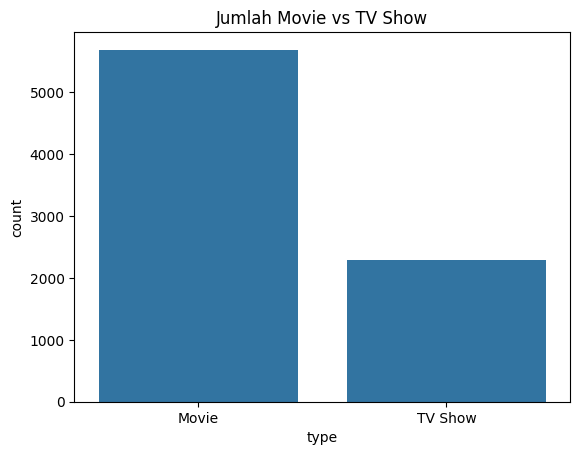

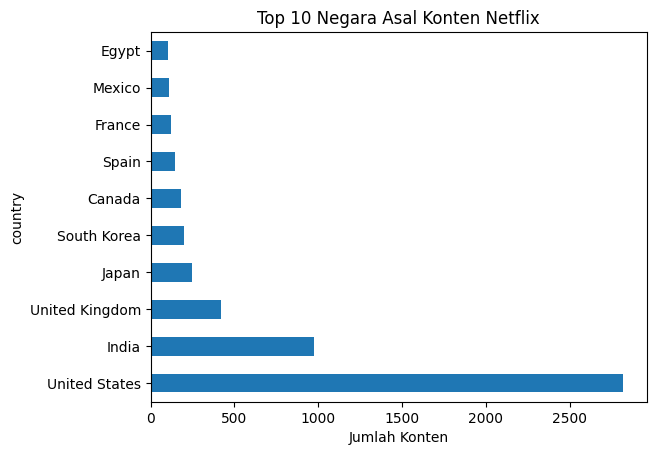

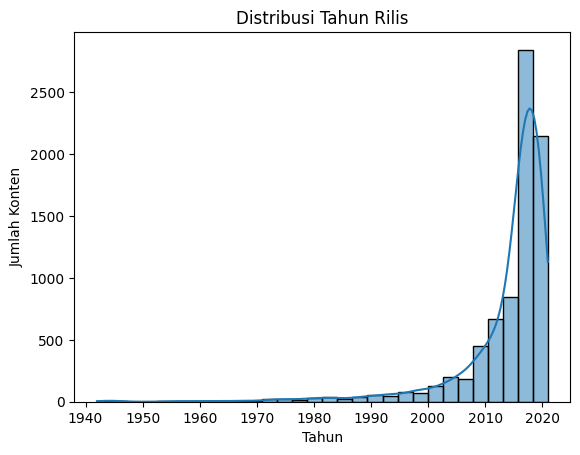

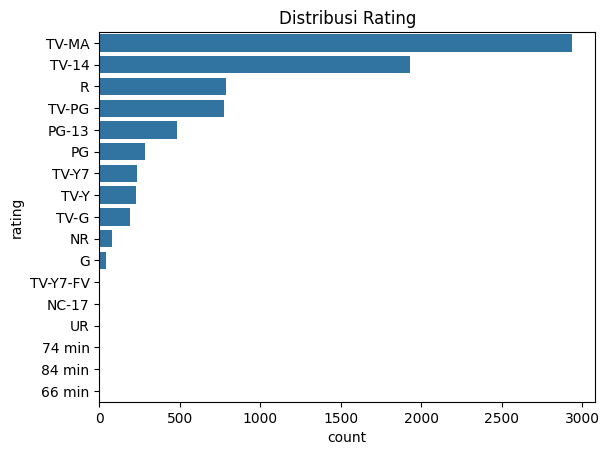

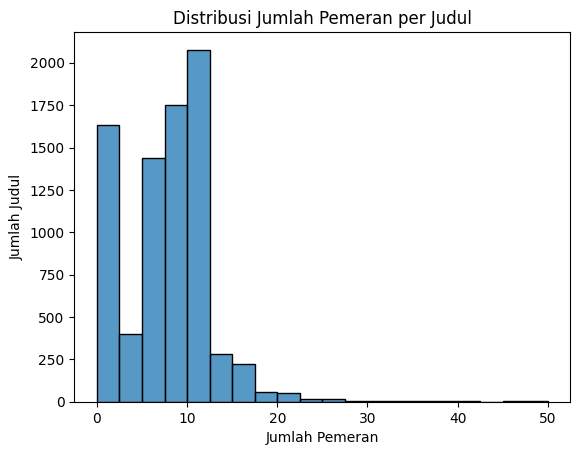

In [5]:
# Visualisasi jumlah film vs TV Show
sns.countplot(data=df, x='type')
plt.title('Jumlah Movie vs TV Show')
plt.show()

# Jumlah konten berdasarkan negara (top 10)
top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='barh')
plt.title('Top 10 Negara Asal Konten Netflix')
plt.xlabel('Jumlah Konten')
plt.show()

# Distribusi tahun rilis
sns.histplot(df['release_year'], bins=30, kde=True)
plt.title('Distribusi Tahun Rilis')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Konten')
plt.show()

# Rating terbanyak
sns.countplot(y='rating', data=df, order=df['rating'].value_counts().index)
plt.title('Distribusi Rating')
plt.show()

# Jumlah pemeran per judul (num_cast)
sns.histplot(df['num_cast'], bins=20)
plt.title('Distribusi Jumlah Pemeran per Judul')
plt.xlabel('Jumlah Pemeran')
plt.ylabel('Jumlah Judul')
plt.show()

## Penjelasan Matematis

### Distribusi Frekuensi
**Distribusi frekuensi** adalah cara menghitung berapa kali setiap nilai unik muncul dalam sebuah kumpulan data, baik itu data kategori maupun numerik. Ini bukan rumus matematis yang eksplisit, melainkan konsep penghitungan sederhana:

$$\text{Frekuensi} = \text{Jumlah Kemunculan Setiap Nilai}$$

### Modus
**Modus** adalah nilai yang paling sering muncul dalam suatu kumpulan data. Misalnya, jika Anda memiliki data $[1, 2, 2, 3]$, maka modus dari data tersebut adalah $2$.

### Histogram
**Histogram** adalah jenis grafik yang menampilkan sebaran atau distribusi data numerik. Data dibagi ke dalam beberapa **rentang** atau "bins", dan tinggi setiap batang pada histogram menunjukkan berapa banyak data yang jatuh ke dalam rentang tersebut.

### KDE (Kernel Density Estimation)
**KDE** adalah metode untuk memperkirakan distribusi probabilitas dari data numerik secara mulus (smooth). KDE bekerja dengan menempatkan fungsi "kernel" (umumnya fungsi Gaussian) di sekitar setiap titik data, lalu menjumlahkan kontribusi dari semua kernel tersebut.

Rumus untuk KDE adalah:
$$\hat{f}_h(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left(\frac{x - x_i}{h}\right)$$
Di mana:
* $K$ adalah **fungsi kernel** (seringkali Gaussian).
* $h$ adalah **bandwidth**, yang mengontrol "kehalusan" atau lebar kurva estimasi.
* $x_i$ adalah titik data individu.

### Value Counts
**Value counts** adalah penghitungan jumlah data untuk setiap nilai unik dalam sebuah kolom. Ini sangat berguna untuk membuat visualisasi seperti **bar chart**, karena dengan cepat menunjukkan sebaran frekuensi dari nilai-nilai diskrit.